# Projeto 1 - Ciência dos Dados

Nome: Lucas Keichi Fukada

## Pergunta (s) a ser respondida

O fluxo de pessoas entre os países do MERCOSUL com a entrada e saída da Venezuela no grupo fez diferença para a porcentagem da população empregada dos outros países do bloco?

## Explicação da hipótese e mecanismo

### Hipótese: 

A Venezuela afeta os outros países, pois, uma vez dentro do bloco econômico, é mais fácil ir para outro país desse grupo e conseguir um emprego.

### Mecanismo: 

Dentro do MERCOSUL, conseguir a permissão de permanência em outros países do bloco é mais fácil devido a políticas de imigração definidas pelos países participantes para estimular a economia. Devida a essa facilidade, pessoas desempregadas ou que buscam melhores condições de vida, podem desenvolver o interesse em mudarem-se para países vizinhos. Por isso, a entrada da Venezuela no MERSOCUL (2012 - 2016) deveria ter surtido um fluxo de imigração para países do bloco alterando as taxas de desemprego, seja completando vagas de trabalho com menor remuneração devido a uma provável baixa escolaridade/formação ou aumentando as taxas de desemprego  pela competição com os naturais daquele país.

### Estudo de referência

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.202.9658&rep=rep1&type=pdf

Este artigo ("The Economic Impact of Migration: A Survey"), na página 24, fala sobre os efeitos da migração relacionando com as taxas de desemprego.

## Bases de dados usadas

Porcentagem de empregados acima de 15 anos:
https://www.ilo.org/ilostat/faces/oracle/webcenter/portalapp/pagehierarchy/Page3.jspx?MBI_ID=7&_afrLoop=3055538129811766&_afrWindowMode=0&_afrWindowId=mdmwh3h32_1#!%40%40%3F_afrWindowId%3Dmdmwh3h32_1%26_afrLoop%3D3055538129811766%26MBI_ID%3D7%26_afrWindowMode%3D0%26_adf.ctrl-state%3Dmdmwh3h32_45

Porcentagem de estrangeiros empregados:
https://www.ilo.org/ilostat/faces/oracle/webcenter/portalapp/pagehierarchy/Page27.jspx?subject=MIG&indicator=MST_TEMP_SEX_AGE_CBR_NB&datasetCode=A&collectionCode=ILMS&_afrLoop=3622655226672185&_afrWindowMode=0&_afrWindowId=null#!%40%40%3Findicator%3DMST_TEMP_SEX_AGE_CBR_NB%26_afrWindowId%3Dnull%26subject%3DMIG%26_afrLoop%3D3622655226672185%26datasetCode%3DA%26collectionCode%3DILMS%26_afrWindowMode%3D0%26_adf.ctrl-state%3D16jmj4pltv_97

Porcentagem de estrangeiros desempregados:
https://www.ilo.org/ilostat/faces/oracle/webcenter/portalapp/pagehierarchy/Page27.jspx?indicator=MST_TUNE_SEX_AGE_CBR_NB&subject=MIG&datasetCode=A&collectionCode=ILMS&_adf.ctrl-state=16jmj4pltv_135&_afrLoop=3752002389648540&_afrWindowMode=0&_afrWindowId=16jmj4pltv_132#!%40%40%3Findicator%3DMST_TUNE_SEX_AGE_CBR_NB%26_afrWindowId%3D16jmj4pltv_132%26subject%3DMIG%26_afrLoop%3D3752002389648540%26datasetCode%3DA%26collectionCode%3DILMS%26_afrWindowMode%3D0%26_adf.ctrl-state%3D17gsce02qv_35

## Análise de dados

Para analisar tal efeito inicialmente, serão manipulados os dados sobre a quantidade de pessoas empregadas, oferecidos pela Organização Internacional do Trabalho, especificamente perto dos anos de entrada e suspensão da Venezuela. Também serão analisados outros países, nesse caso os outros integrantes dos BRICS por apresentarem algumas características similares.

In [899]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

emprego = pd.read_excel("employmentratio.xlsx")
emprego_imigrante = pd.read_excel("employed_migration.xls")
desemprego_imigrante = pd.read_excel("unemployment_migration.xls")

In [900]:
emprego = emprego.set_index("Reference area")
emprego_mercosul = emprego.loc[["Brazil", "Argentina", "Uruguay", "Paraguay"]]
emprego_mercosul = emprego_mercosul[emprego_mercosul.Age == "15+"]
emprego_mercosul = emprego_mercosul.pivot_table(values='Total', index=emprego_mercosul.index, columns='Time', aggfunc='first')

emprego_outros = emprego.loc[["India", "Mexico", "China", "South Africa", "Russian Federation", "United States", "Germany", "Canada", "Australia", "Indonesia", "Thailand"]]
emprego_outros = emprego_outros[emprego_outros.Age == "15+"]
emprego_outros = emprego_outros.pivot_table(values='Total', index=emprego_outros.index, columns='Time', aggfunc='first')

emprego_geral = emprego_mercosul.transpose().join(emprego_outros.transpose()).transpose()
paises_no_mercosul = ["Brazil", "Paraguay", "Uruguay", "Argentina"]
mercosul = []
for i in emprego_geral.index:
    if i in paises_no_mercosul:
        mercosul.append(1)
    else:
        mercosul.append(0)
emprego_geral["Pertence ao MERCOSUL"] = mercosul

emprego_imigrante = emprego_imigrante.set_index("Country")
emprego_imigrante = emprego_imigrante.loc[["Brazil", "Argentina", "Uruguay", "Paraguay"]]
emprego_imigrante = emprego_imigrante[emprego_imigrante.Age == "15+ (Age (Youth, adults))"]
emprego_imigrante = emprego_imigrante[emprego_imigrante.Sex == "Total (Sex)"]
emprego_imigrante = emprego_imigrante[emprego_imigrante["Place of birth"] == "Foreign-born (Place of birth)"]
emprego_imigrante = emprego_imigrante.drop(columns = ["Sex", "Age", "Place of birth", "Survey", "Type of Source"])
emprego_imigrante.columns = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

desemprego_imigrante = desemprego_imigrante.set_index("Country")
desemprego_imigrante = desemprego_imigrante.loc[["Brazil", "Argentina", "Uruguay", "Paraguay"]]
desemprego_imigrante = desemprego_imigrante[desemprego_imigrante.Age == "15+ (Age (Youth, adults))"]
desemprego_imigrante = desemprego_imigrante[desemprego_imigrante.Sex == "Total (Sex)"]
desemprego_imigrante = desemprego_imigrante[desemprego_imigrante["Place of birth"] == "Foreign-born (Place of birth)"]
desemprego_imigrante = desemprego_imigrante.drop(columns = ["Sex", "Age", "Place of birth", "Survey", "Type of Source"])
desemprego_imigrante.columns = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


## Tabela Geral com as porcentagens de pessoas empregadas em cada país

In [901]:
emprego_geral

Time,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Pertence ao MERCOSUL
Reference area,,,,,,,,,,,,,,,,,,,,,
Argentina,53.00,51.39,49.44,52.41,53.93,54.91,56.05,56.38,56.09,55.94,...,55.51,55.55,55.56,55.57,54.76,54.33,54.10,54.02,53.90,1
Brazil,57.81,58.20,58.98,58.59,59.79,60.06,60.30,60.23,60.87,60.30,...,59.68,58.69,56.42,55.88,55.92,55.99,56.13,56.15,56.07,1
Paraguay,62.85,62.91,63.10,63.87,67.24,67.44,64.94,66.44,66.69,67.19,...,66.03,66.40,66.62,67.25,67.32,67.46,67.57,67.59,67.51,1
Uruguay,54.41,55.35,54.63,53.92,54.13,54.99,56.78,58.85,60.25,60.69,...,61.09,60.08,59.59,59.13,59.21,59.33,59.45,59.51,59.58,1
Australia,59.38,59.26,59.55,60.01,60.20,61.29,61.79,62.48,62.84,61.89,...,60.82,61.10,61.18,61.50,61.53,61.46,61.30,61.17,61.02,0
Canada,60.81,60.65,61.24,61.98,62.19,62.16,62.37,63.00,63.09,61.18,...,61.16,61.02,60.81,61.31,61.37,61.05,60.71,60.40,60.13,0
China,74.67,73.59,72.51,71.41,70.73,70.08,69.58,69.19,68.57,68.09,...,66.95,66.68,66.42,66.16,65.68,65.18,64.68,64.15,63.66,0
Germany,53.47,53.46,52.95,52.25,51.42,51.93,52.82,54.07,54.76,54.76,...,57.37,57.49,58.00,58.39,58.54,58.63,58.61,58.47,58.32,0
India,55.92,56.02,56.10,56.22,56.47,56.69,55.99,55.30,54.52,53.57,...,50.80,50.76,50.71,50.72,50.60,50.49,50.37,50.25,50.13,0


## MERCOSUL

Aqui encontram-se dados sobre a taxa de pessoas empregadas para os países do MERCOSUL e logo abaixo temos o mesmo gráfico visando o período específico da entrada e saída da Venezuela.

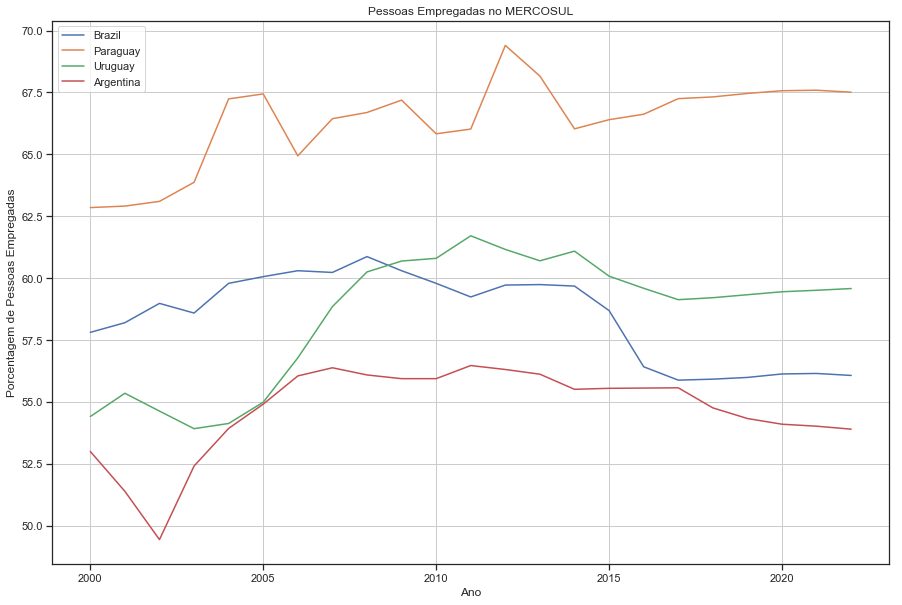

In [902]:
paises = ["Brazil", "Paraguay", "Uruguay", "Argentina"]
plt.figure(figsize=(15,10))
for i in paises:
    emprego_mercosul.loc[i,:].plot(label = i)
plt.legend()
plt.title("Pessoas Empregadas no MERCOSUL")
plt.xlabel("Ano")
plt.ylabel("Porcentagem de Pessoas Empregadas")
plt.grid(True)
plt.show()

## Período de adesão e suspensão (2012-2016)

Com maior foco nos anos de interesse.

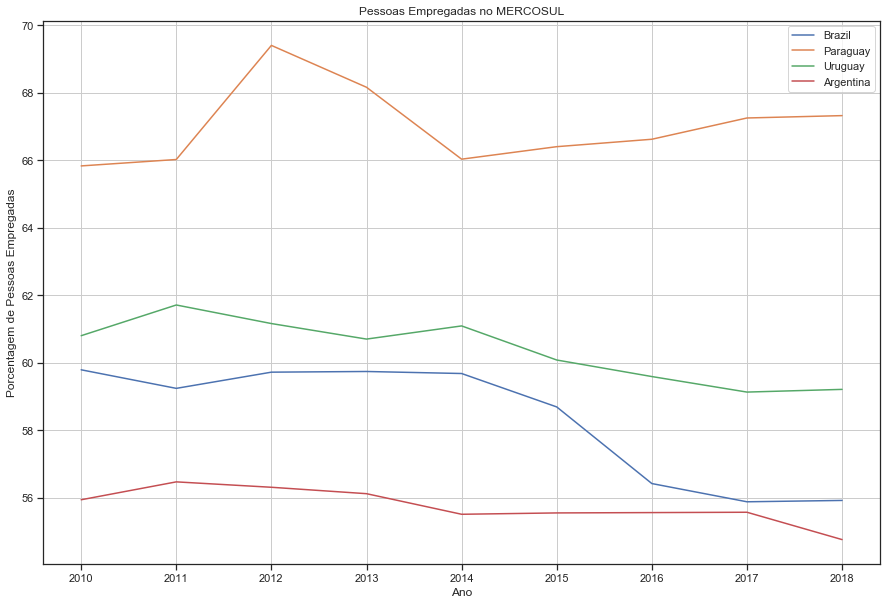

In [903]:
paises = ["Brazil", "Paraguay", "Uruguay", "Argentina"]
plt.figure(figsize=(15,10))
for i in paises:
    emprego_mercosul.loc[i, [2010,2011,2012,2013,2014,2015,2016,2017,2018]].plot(label = i)
plt.legend()
plt.title("Pessoas Empregadas no MERCOSUL")
plt.xlabel("Ano")
plt.ylabel("Porcentagem de Pessoas Empregadas")
plt.grid(True)
plt.show()

Para verificar se existe alguma relação linear entre os países cruzaremos as taxas de pessoas empregadas de países diferentes e, então, calcularemos a correlação entre eles. Assim, caso as correlações sejam próximas de 1, então talvez conseguiremos afirmar que houveram efeitos.

## Gráfico de Dispersão MERCOSUL (2012-2016)

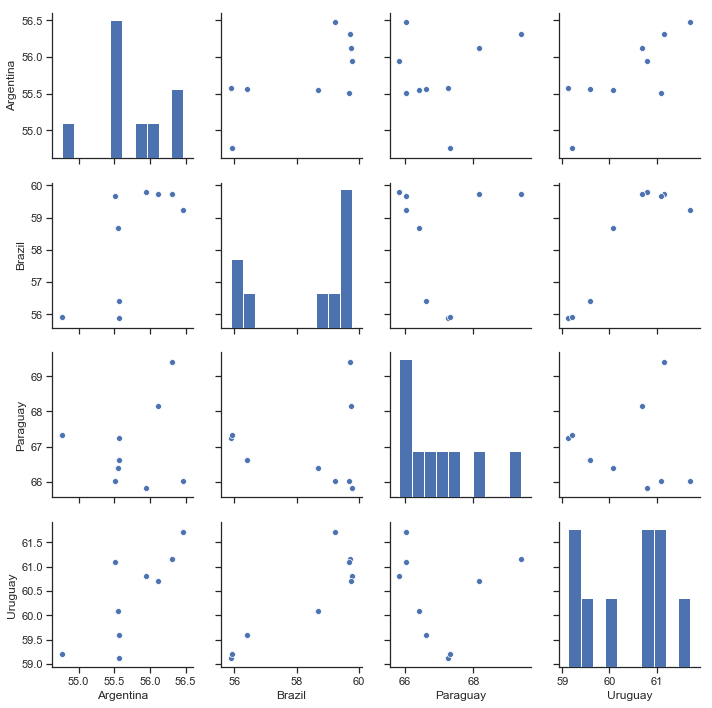

In [904]:
emprego_mercosul_trans = emprego_mercosul.loc[:,[2010,2011,2012,2013,2014,2015,2016,2017,2018]].transpose()
sns.set(style="ticks")
sns.pairplot(emprego_mercosul_trans)

## Tabela de Correlação

In [905]:
emprego_mercosul_trans.corr()

Reference area,Argentina,Brazil,Paraguay,Uruguay
Reference area,,,,
Argentina,1.000000,0.695333,0.186361,0.788119
Brazil,0.695333,1.000000,0.011468,0.902232
Paraguay,0.186361,0.011468,1.000000,-0.051577
Uruguay,0.788119,0.902232,-0.051577,1.000000


Como é possível observar, não há uma resposta clara, pois, apesar de existirem valores próximos de 1, ainda temos valores próximos de 0 e até abaixo.

Avaliaremos países de outros blocos para verificar se existem algumas semelhanças ou discrepâncias quando comparamos com os dados que acabamos de obter.

## Outros países

Aqui encontram-se os dados dos outros países de referência para tentar analisar um contexto mais global. No próximo gráfico a análise é mais focada no período de entrada e saída da Venezuela.

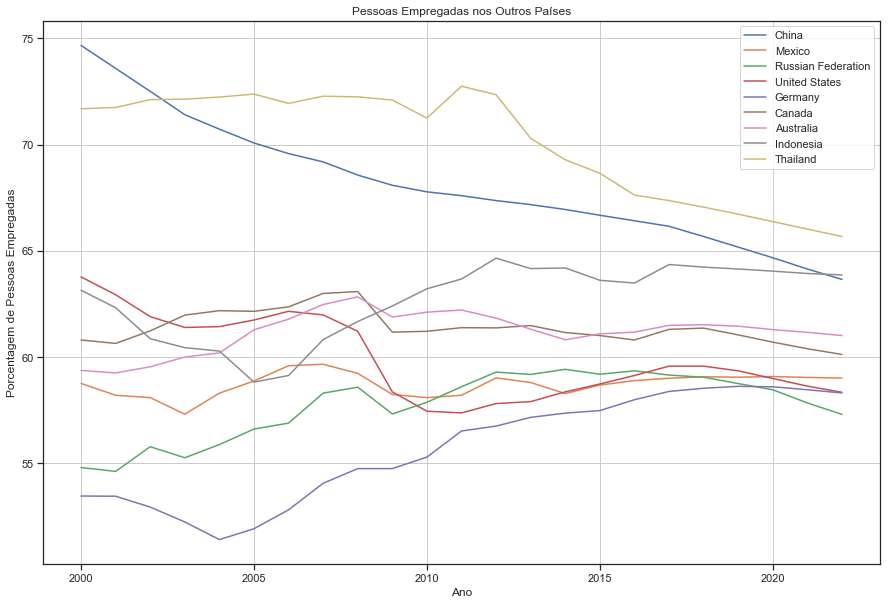

In [906]:
paises = ["China", "Mexico", "Russian Federation", "United States", "Germany", "Canada", "Australia", "Indonesia", "Thailand"]
plt.figure(figsize=(15,10))
for i in paises:
    emprego_outros.loc[i,:].plot(label = i)
plt.legend()
plt.title("Pessoas Empregadas nos Outros Países")
plt.xlabel("Ano")
plt.ylabel("Porcentagem de Pessoas Empregadas")
plt.grid(True)
plt.show()

## Período de adesão e suspensão (2012-2016)

Com maior foco nos anos de interesse.

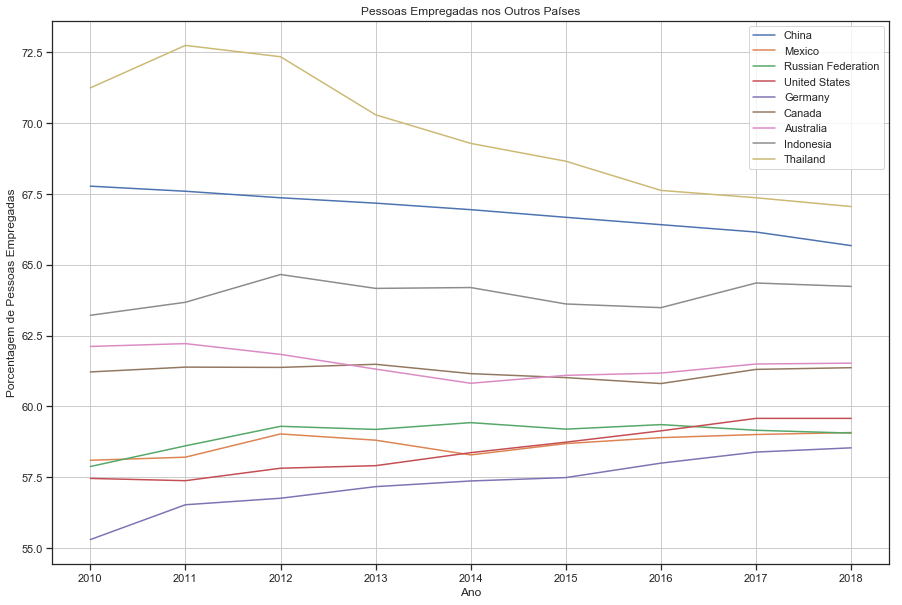

In [907]:
paises = ["China", "Mexico", "Russian Federation", "United States", "Germany", "Canada", "Australia", "Indonesia", "Thailand"]
plt.figure(figsize=(15,10))
for i in paises:
    emprego_outros.loc[i, [2010,2011,2012,2013,2014,2015,2016,2017,2018]].plot(label = i)
plt.legend()
plt.title("Pessoas Empregadas nos Outros Países")
plt.xlabel("Ano")
plt.ylabel("Porcentagem de Pessoas Empregadas")
plt.grid(True)
plt.show()

Como pode ser observado, não houveram variações tão significativas no período de estudo com exceção daqueles que estavam nos extremos do gráfico. A maioria dos países estão tendendo ao que parece uma estabilização.

Assim como foi feito com o MERCOSUL, cruzaremos as taxas e calcular a correlação dos dados para verificar se os mesmos padrões acontecem. Caso isso seja verdadeiro, é razoável dizer que o a Venezuela não teve um impacto significativo como esperado.

## Gráficos de Dispersão dos outros países (2012-2016)

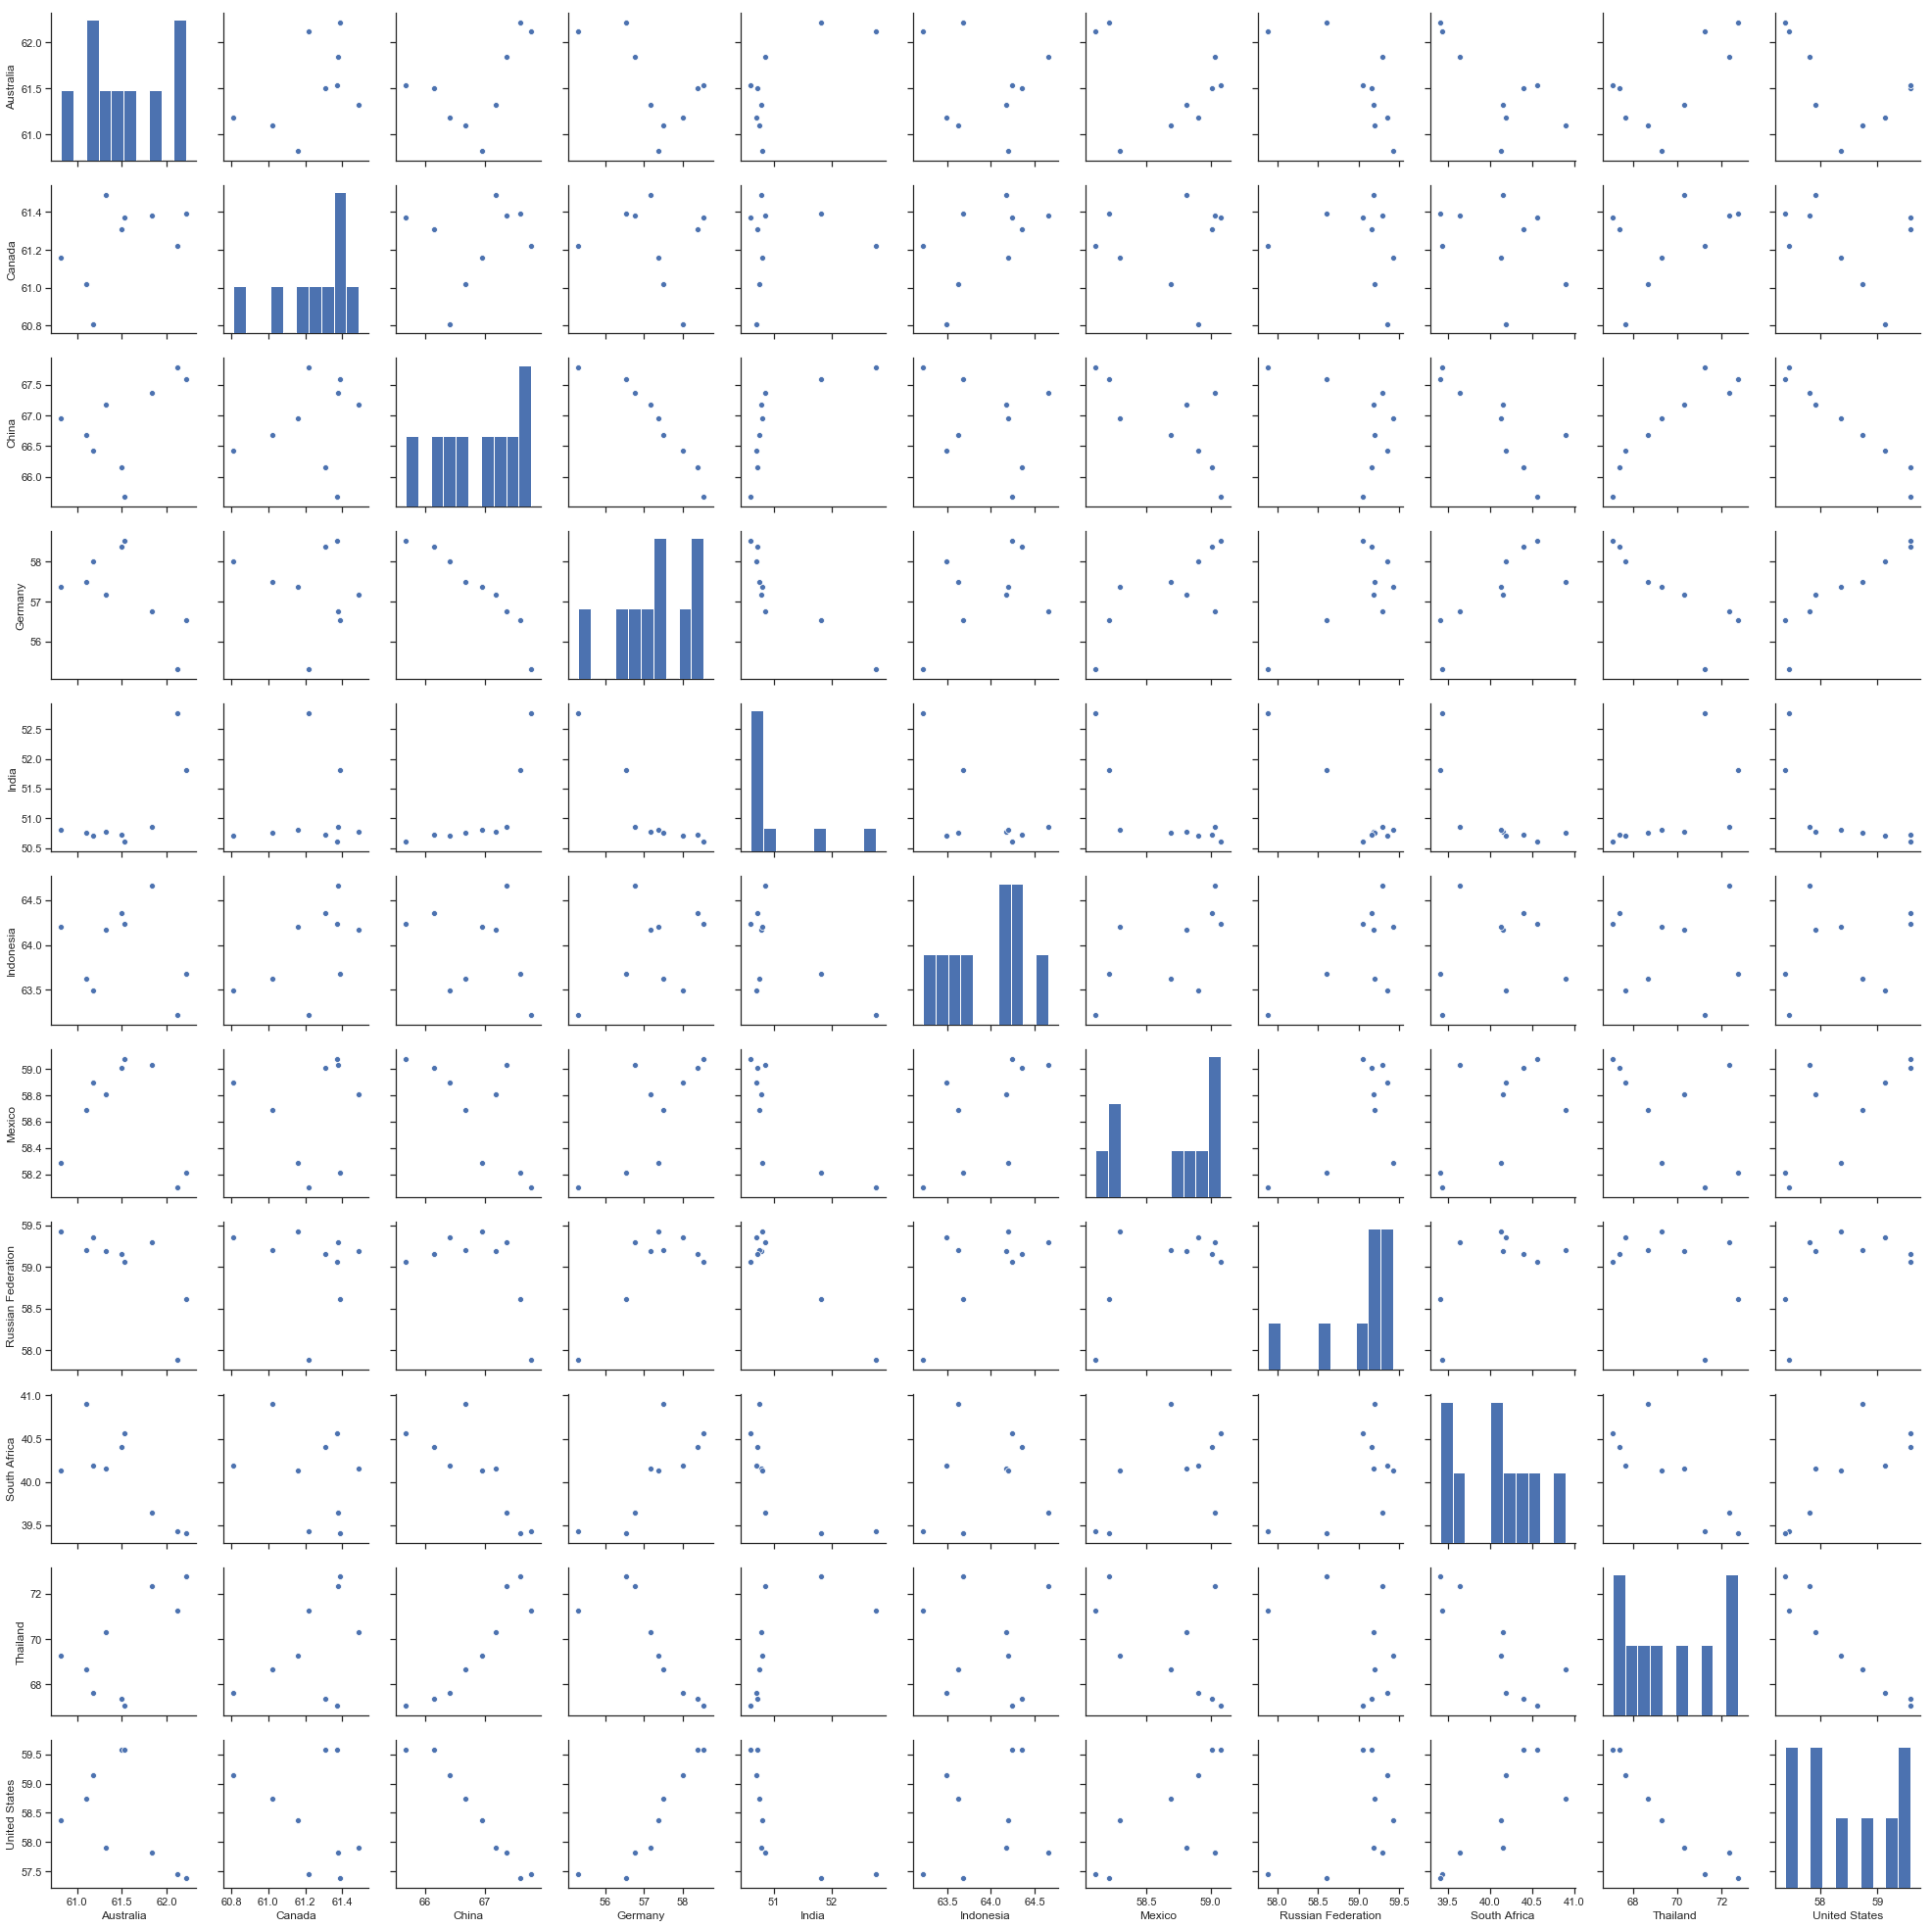

In [908]:
emprego_outros_trans = emprego_outros.loc[:,[2010,2011,2012,2013,2014,2015,2016,2017,2018]].transpose()
sns.set(style="ticks")
sns.pairplot(emprego_outros_trans)

## Tabela de Correlação

In [909]:
emprego_outros_trans.corr()

Reference area,Australia,Canada,China,Germany,India,Indonesia,Mexico,Russian Federation,South Africa,Thailand,United States
Reference area,,,,,,,,,,,
Australia,1.000000,0.473978,0.508901,-0.594801,0.722325,-0.184235,-0.277770,-0.757772,-0.743619,0.646540,-0.538902
Canada,0.473978,1.000000,0.221013,-0.170440,0.108028,0.549513,0.049101,-0.191826,-0.318193,0.432523,-0.333698
China,0.508901,0.221013,1.000000,-0.940901,0.717575,-0.297799,-0.704923,-0.531158,-0.801155,0.922594,-0.977090
Germany,-0.594801,-0.170440,-0.940901,1.000000,-0.871044,0.443747,0.745882,0.740833,0.781655,-0.832508,0.916944
India,0.722325,0.108028,0.717575,-0.871044,1.000000,-0.634086,-0.781189,-0.954751,-0.733193,0.593202,-0.685632
Indonesia,-0.184235,0.549513,-0.297799,0.443747,-0.634086,1.000000,0.606349,0.612862,0.164958,-0.056882,0.246557
Mexico,-0.277770,0.049101,-0.704923,0.745882,-0.781189,0.606349,1.000000,0.638093,0.549413,-0.526573,0.683219
Russian Federation,-0.757772,-0.191826,-0.531158,0.740833,-0.954751,0.612862,0.638093,1.000000,0.587312,-0.435700,0.521483
South Africa,-0.743619,-0.318193,-0.801155,0.781655,-0.733193,0.164958,0.549413,0.587312,1.000000,-0.828651,0.799386


Considerando apenas as taxas de empregados entre os países do MERCOSUL, não é possível perceber uma resposta positiva quanto a alteração na porcentagem. Mesmo quando fazemos uma comparação com os outros países de outras regiões com taxas de empregabilidade próximas, ainda não é possível formular alguma relação, pois as variações são parecidas, tentendo a uma estabilização. Além disso, as correlações também não apresentam um padrão muito visível.  

Partiremos, então, para a média entre os países pertencentes e os não pertencentes para tentar algo um pouco mais geral.

## Tabela das taxas médias de pessoas empregadas

In [918]:
pd.pivot_table(data = emprego_geral, index="Pertence ao MERCOSUL")

Time,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Pertence ao MERCOSUL,,,,,,,,,,,,,,,,,,,,,
0,59.6000,59.241818,58.950909,58.654545,58.7600,59.014545,59.270909,59.755455,60.001818,59.021818,...,58.951818,58.800909,58.805455,58.711818,58.905455,58.845455,58.652727,58.434545,58.170909,57.950909
1,57.0175,56.962500,56.537500,57.197500,58.7725,59.350000,59.517500,60.475000,60.975000,61.030000,...,61.180000,60.577500,60.180000,59.547500,59.457500,59.302500,59.277500,59.312500,59.317500,59.265000


## Gráfico das Médias

Para uma comparação mais direta entre os países do MERCOSUL e os outros. Logo a seguir encontra-se outro gráfico com o foco no período de entrada e saída da Venezuela.

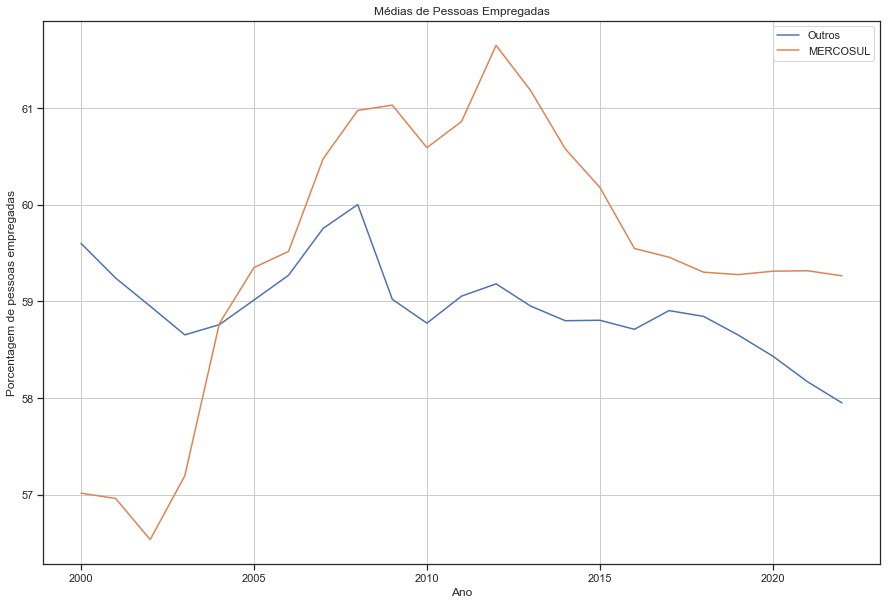

In [920]:
pd.pivot_table(data = emprego_geral, index="Pertence ao MERCOSUL").transpose().plot(figsize = (15,10), grid = True, title = "Médias de Pessoas Empregadas")
plt.ylabel("Porcentagem de pessoas empregadas")
plt.xlabel("Ano")
plt.legend([ "Outros", "MERCOSUL"])
plt.show()

## Período de adesão e suspensão (2012-2016)

Com maior foco no período de interesse.

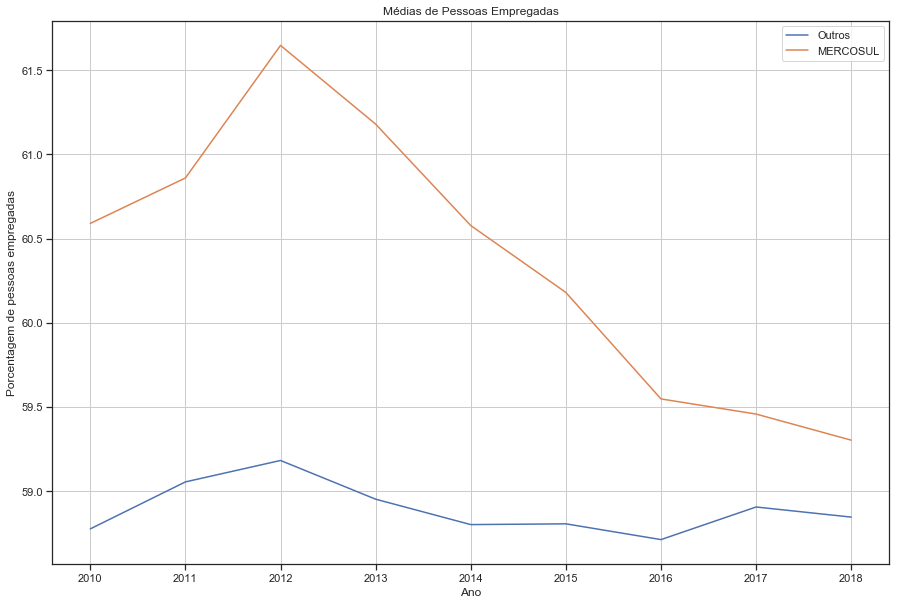

In [921]:
pd.pivot_table(data = emprego_geral, index="Pertence ao MERCOSUL").loc[:,[2010,2011,2012,2013,2014,2015,2016,2017,2018]].transpose().plot(figsize = (15,10), grid = True, title = "Médias de Pessoas Empregadas")
plt.ylabel("Porcentagem de pessoas empregadas")
plt.xlabel("Ano")
plt.legend([ "Outros", "MERCOSUL"])
plt.show()

Nesses dois últimos gráficos é possível perceber que, em 2012, no pico da reta do MERCOSUL que coincide no ano de entrada da Venezuela no bloco, além disso, no ano de suspensão, começam a parar de cair. Estes eventos não occorem com os outros países fora do bloco nesses mesmos períodos.

Para gerar uma base mais solida tentaremos uma outra abordagem, analisaremos a quantidade de trabalhadores e desempregados estrangeiros em cada país, pois sabendo a variação desses números é possível saber se houve fluxo de trabalhadores em cada país. 

## Estrangeiros Empregados

Aqui é apresentado a quantidade em milhares de estrangeiros empregados. Como é possível perceber, os países não estão interessados/não conseguem coletar estes tipos de dado, o que afeta nossa análise.

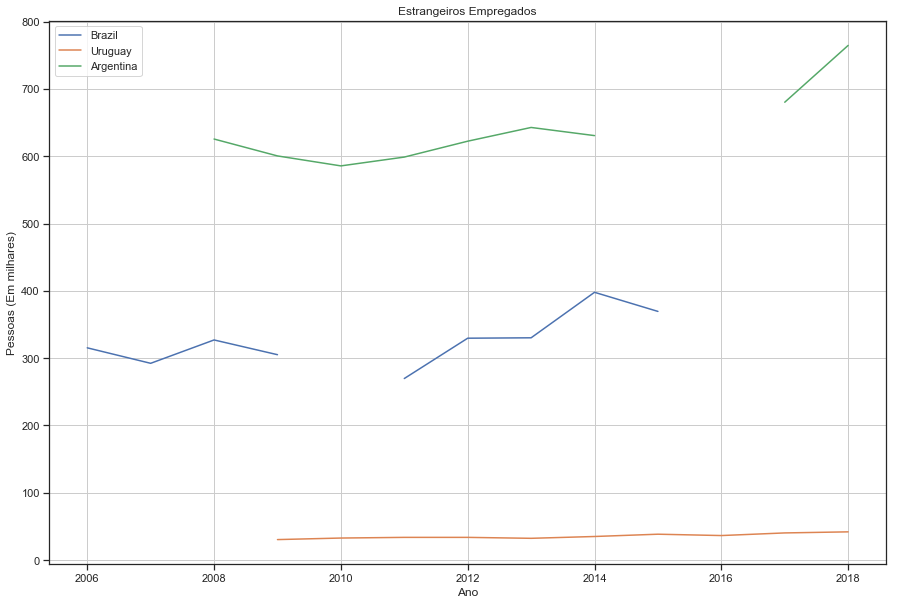

In [911]:
paises = ["Brazil", "Uruguay", "Argentina"]
plt.figure(figsize=(15,10))
for i in paises:
    emprego_imigrante.loc[i,:].plot(label = i)
plt.legend()
plt.title("Estrangeiros Empregados")
plt.xlabel("Ano")
plt.ylabel("Pessoas (Em milhares)")
plt.grid(True)
plt.show()

### Estrangeiros Empregados (Uruguai)

Aqui é apresentado o gráfico da quantidade em milhares da população estrangeira empregada no Uruguai separadamente para uma melhor vizualização, pois sua população é menor em comparação aos outros países.

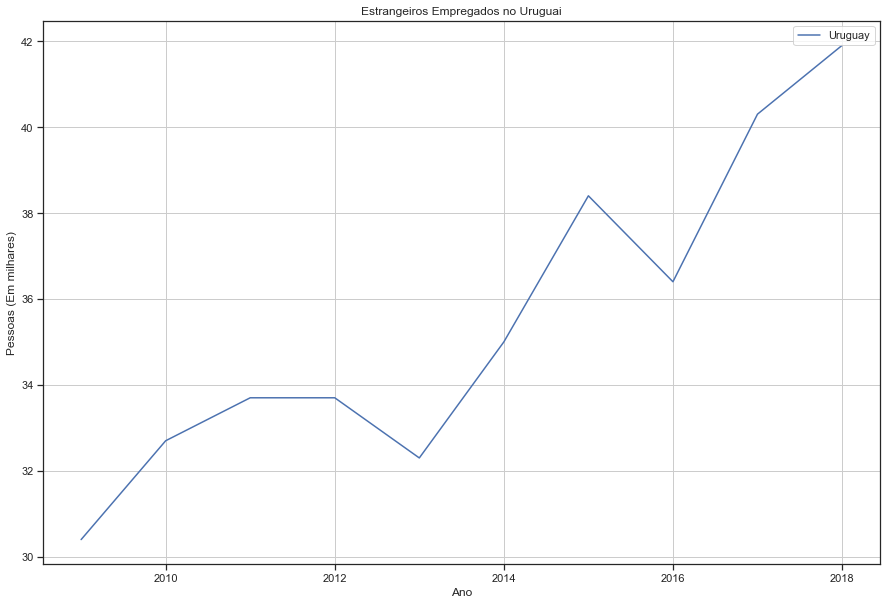

In [912]:
plt.figure(figsize=(15,10))
emprego_imigrante.loc["Uruguay",:].plot(label = "Uruguay")
plt.legend()
plt.title("Estrangeiros Empregados no Uruguai")
plt.xlabel("Ano")
plt.ylabel("Pessoas (Em milhares)")
plt.grid(True)
plt.show()

## Estrangeiros Desempregados

Aqui é apresentado o gráfico da quantidade em milhares de estreangeiros desempregados. Assim como o gráfico de estrangeiros empregados, este também possui uma deficiência quanto a quantidade de dados.

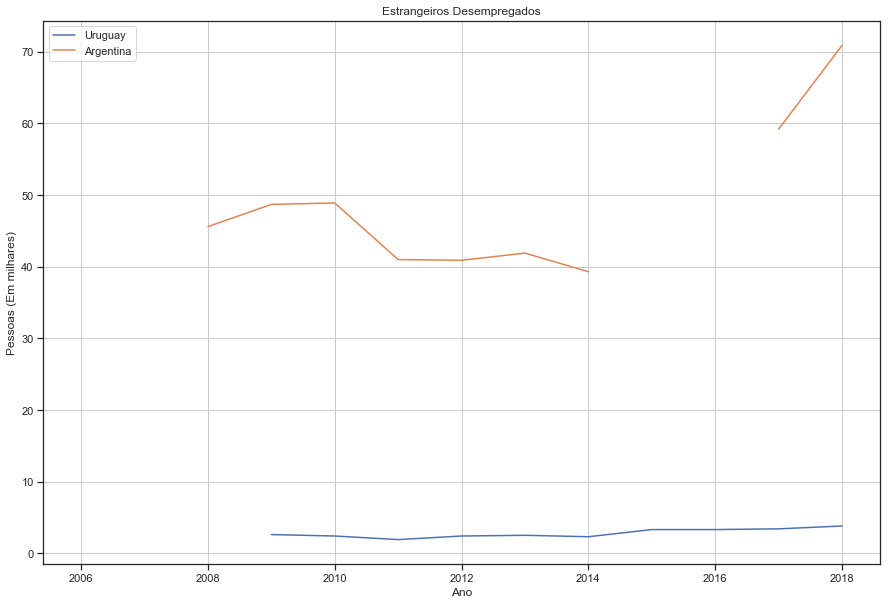

In [913]:
paises = ["Uruguay", "Argentina"]
plt.figure(figsize=(15,10))
for i in paises:
    desemprego_imigrante.loc[i,:].plot(label = i)
plt.legend()
plt.title("Estrangeiros Desempregados")
plt.xlabel("Ano")
plt.ylabel("Pessoas (Em milhares)")
plt.grid(True)
plt.show()

### Estrangeiros Desempregados (Uruguai)

Aqui é apresentado o gráfico da quantidade em milhares da população estrangeira desempregada no Uruguai separadamente para uma melhor vizualização, pois sua população é menor em comparação aos outros países.

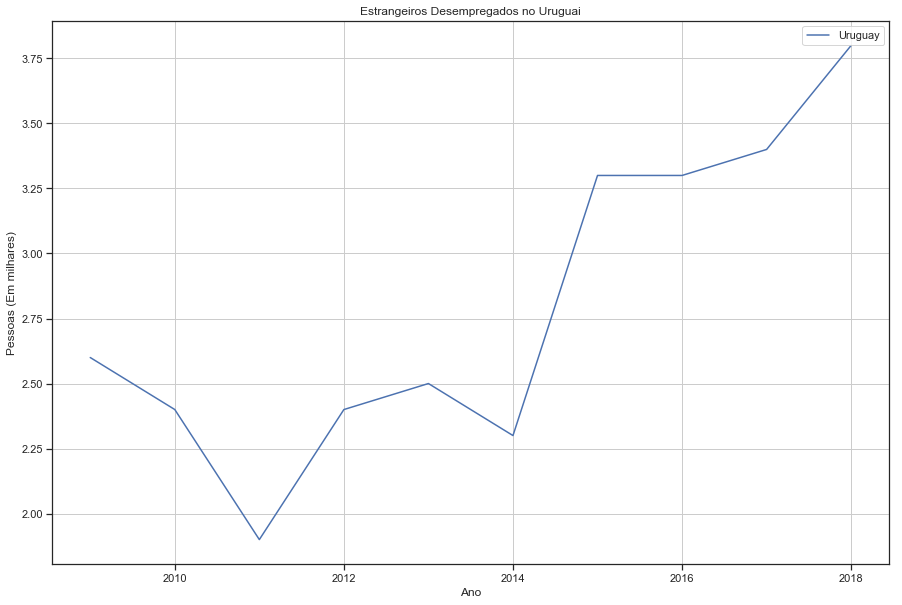

In [914]:
plt.figure(figsize=(15,10))
desemprego_imigrante.loc["Uruguay",:].plot(label = "Uruguay")
plt.legend()
plt.title("Estrangeiros Desempregados no Uruguai")
plt.xlabel("Ano")
plt.ylabel("Pessoas (Em milhares)")
plt.grid(True)
plt.show()

A análise acaba perdendo validade por conta da falta de dados, mas no caso do Uruguai é possível perceber que o país não recebeu uma quantia significativa de imigrantes o que leva a entender que a Venezuela não causou um impacto muito notável. 

## Conclusão

Não é possível afirmar que a introdução e suspensão da Venezuela no bloco econômico afetou as taxas de desemprego nos países do MERCOSUL. Evidências como as taxas estabilizadas e as correlações sem um padrão bem definido, tanto no âmbito local quanto no global que, por serem parecidas, demonstram uma falta de influência do país interferente. Há dados que mostram o contrário, ou seja, que houveram alguns impactos como o gráfico das médias de pessoas empregadas, onde a reta do MERCOSUL variava nos anos de entrada e saída, todavia, por falta de dados, não é possível fazer afirmações com bases sólidas.